In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.style.use('ggplot')

In [ ]:
car=pd.read_csv('car.csv')

In [56]:
car.head(10)

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel
5,Ford EcoSport Titanium 1.5L TDCi,Ford,2015,Ask For Price,"59,000 kms",Diesel
6,Ford Figo,Ford,2012,"1,75,000","41,000 kms",Diesel
7,Hyundai Eon,Hyundai,2013,"1,90,000","25,000 kms",Petrol
8,Ford EcoSport Ambiente 1.5L TDCi,Ford,2016,"8,30,000","24,530 kms",Diesel
9,Maruti Suzuki Alto K10 VXi AMT,Maruti,2015,"2,50,000","60,000 kms",Petrol


In [5]:
car.shape

(892, 6)

In [6]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [59]:
car['year'].unique()  # 1. we can see there are some values in text in year column  # 2.need to change datatype
                                                

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', '2000',
       '...', '150k', 'TOUR', '2003', 'r 15', '2004', 'Zest', '/-Rs',
       'sale', '1995', 'ara)', '2002', 'SELL', '2001', 'tion', 'odel',
       '2 bs', 'arry', 'Eon', 'o...', 'ture', 'emi', 'car', 'able', 'no.',
       'd...', 'SALE', 'digo', 'sell', 'd Ex', 'n...', 'e...', 'D...',
       ', Ac', 'go .', 'k...', 'o c4', 'zire', 'cent', 'Sumo', 'cab',
       't xe', 'EV2', 'r...', 'zest'], dtype=object)

In [63]:
car['Price'].unique()  #here u see 'Ask For Price' which is invalid need to remove

array(['80,000', '4,25,000', 'Ask For Price', '3,25,000', '5,75,000',
       '1,75,000', '1,90,000', '8,30,000', '2,50,000', '1,82,000',
       '3,15,000', '4,15,000', '3,20,000', '10,00,000', '5,00,000',
       '3,50,000', '1,60,000', '3,10,000', '75,000', '1,00,000',
       '2,90,000', '95,000', '1,80,000', '3,85,000', '1,05,000',
       '6,50,000', '6,89,999', '4,48,000', '5,49,000', '5,01,000',
       '4,89,999', '2,80,000', '3,49,999', '2,84,999', '3,45,000',
       '4,99,999', '2,35,000', '2,49,999', '14,75,000', '3,95,000',
       '2,20,000', '1,70,000', '85,000', '2,00,000', '5,70,000',
       '1,10,000', '4,48,999', '18,91,111', '1,59,500', '3,44,999',
       '4,49,999', '8,65,000', '6,99,000', '3,75,000', '2,24,999',
       '12,00,000', '1,95,000', '3,51,000', '2,40,000', '90,000',
       '1,55,000', '6,00,000', '1,89,500', '2,10,000', '3,90,000',
       '1,35,000', '16,00,000', '7,01,000', '2,65,000', '5,25,000',
       '3,72,000', '6,35,000', '5,50,000', '4,85,000', '3,29,5

In [73]:
# car['kms_driven']  and car['fuel_type'] have some null values.
print(car.isnull().sum())

name           0
company        0
year           0
Price          0
kms_driven    52
fuel_type     55
dtype: int64


##### Creating backup copy

In [74]:
backup=car.copy()

## Things what we understood from the Dataset

- car names are pretty inconsistent.
- car names have company names attached to it.
- some car names are spam like 'Maruti Ertiga showroom condition with' and 'Well mentained Tata Sumo' we will keep only starting 3 words.
- company: many of the names are not of any company like 'Used', 'URJENT', and so on.
- year has many non-year values.
- year is in object. Need to Change to 'integer'
- Price has 'Ask for Price' like value
- Price has commas in its prices and is in object
- kms_driven has object values with kms at last.
- It has nan values and two rows have 'Petrol' in them
- fuel_type has nan values

## Cleaning Data 

####  1.year has many non-year values

In [81]:
# Keeping only numeric columns 
# car['year'].str.isnumeric().sum() -- this shows we have '842' rows numeric 
# and remaining are in object so simply majority is in integer so we will keep only numeric

print(car['year'].str.isnumeric().sum())

842


In [82]:
car=car[car['year'].str.isnumeric()]

In [83]:
car.shape

(842, 6)

#### 2.year is in object. Change to integer

In [84]:
car['year']=car['year'].astype(int)

#### 3.Price has 'Ask for Price'

In [ ]:
# finding how many columns have 'Ask for price' as value
print((car['Price'] =='Ask For Price').sum())  

23


In [91]:
# removing those columns and keeping only valid values i.e. those value that doesn't have 'Ask For Price'
car=car[car['Price']!='Ask For Price']

#### 4.Price has commas in its prices and is in object

In [94]:
car['Price']=car['Price'].str.replace(',','').astype(int)

In [96]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Index: 819 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        819 non-null    object
 1   company     819 non-null    object
 2   year        819 non-null    int64 
 3   Price       819 non-null    int64 
 4   kms_driven  819 non-null    object
 5   fuel_type   816 non-null    object
dtypes: int64(2), object(4)
memory usage: 44.8+ KB


####  5.kms_driven has object values with kms at last.

In [105]:
print(car['kms_driven'].str.split(' '))
print('we want only numeric values so keep only first ')
print(car['kms_driven'].str.split().str.get(0))
print("Replacing 45,000 to 45000 i.e. replace , to nothing")
print(car['kms_driven'].str.split().str.get(0).str.replace(',',''))

0        [45,000, kms]
1            [40, kms]
3        [28,000, kms]
4        [36,000, kms]
6        [41,000, kms]
            ...       
886    [1,32,000, kms]
888      [27,000, kms]
889      [40,000, kms]
890           [Petrol]
891           [Petrol]
Name: kms_driven, Length: 819, dtype: object
we want only numeric values so keep only first 
0        45,000
1            40
3        28,000
4        36,000
6        41,000
         ...   
886    1,32,000
888      27,000
889      40,000
890      Petrol
891      Petrol
Name: kms_driven, Length: 819, dtype: object
Replacing 45,000 to 45000 i.e. replace , to nothing
0       45000
1          40
3       28000
4       36000
6       41000
        ...  
886    132000
888     27000
889     40000
890    Petrol
891    Petrol
Name: kms_driven, Length: 819, dtype: object


In [107]:
car['kms_driven']=car['kms_driven'].str.split().str.get(0).str.replace(',','')

#### 6.It has nan values and two rows have 'Petrol' in them

In [108]:
car=car[car['kms_driven'].str.isnumeric()]

In [109]:
car['kms_driven']=car['kms_driven'].astype(int)

C:\Users\Anjali\AppData\Local\Temp\ipykernel_15672\1713770885.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car['kms_driven']=car['kms_driven'].astype(int)


In [110]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Index: 817 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        817 non-null    object
 1   company     817 non-null    object
 2   year        817 non-null    int64 
 3   Price       817 non-null    int64 
 4   kms_driven  817 non-null    int64 
 5   fuel_type   816 non-null    object
dtypes: int64(3), object(3)
memory usage: 44.7+ KB


#### 7.fuel_type has nan values

In [112]:
car['fuel_type'].isna().sum() # 1 null value removing those

np.int64(1)

In [113]:
car=car[~car['fuel_type'].isna()]

In [114]:
car.shape

(816, 6)

### name and company had spammed data...but with the previous cleaning, those rows got removed.

In [117]:
print(car['name'].unique())
print(car['company'].unique())

['Hyundai Santro Xing XO eRLX Euro III' 'Mahindra Jeep CL550 MDI'
 'Hyundai Grand i10 Magna 1.2 Kappa VTVT'
 'Ford EcoSport Titanium 1.5L TDCi' 'Ford Figo' 'Hyundai Eon'
 'Ford EcoSport Ambiente 1.5L TDCi' 'Maruti Suzuki Alto K10 VXi AMT'
 'Skoda Fabia Classic 1.2 MPI' 'Maruti Suzuki Stingray VXi'
 'Hyundai Elite i20 Magna 1.2' 'Mahindra Scorpio SLE BS IV' 'Audi A8'
 'Audi Q7' 'Mahindra Scorpio S10' 'Maruti Suzuki Alto 800'
 'Maruti Suzuki Alto 800 Vxi' 'Hyundai i20 Sportz 1.2'
 'Maruti Suzuki Alto 800 Lx' 'Maruti Suzuki Vitara Brezza ZDi'
 'Maruti Suzuki Alto LX' 'Mahindra Bolero DI'
 'Maruti Suzuki Swift Dzire ZDi' 'Mahindra Scorpio S10 4WD'
 'Maruti Suzuki Swift Vdi BSIII' 'Maruti Suzuki Wagon R VXi BS III'
 'Maruti Suzuki Wagon R VXi Minor' 'Toyota Innova 2.0 G 8 STR BS IV'
 'Renault Lodgy 85 PS RXL' 'Skoda Yeti Ambition 2.0 TDI CR 4x2'
 'Maruti Suzuki Baleno Delta 1.2' 'Renault Duster 110 PS RxZ Diesel Plus'
 'Renault Duster 85 PS RxE Diesel' 'Honda City 1.5 S MT'
 'Maruti Suzuki 

### Company does not need any cleaning now. Changing car names. Keeping only the first three words

In [128]:
# steps to understand
# print(car['name'].str.split())
# print(car['name'].str.split().str.slice(start=0,stop=3))
# print(car['name'].str.split().str.slice(start=0,stop=3).str.join(' '))


car['name']=car['name'].str.split().str.slice(start=0,stop=3).str.join(' ')

In [131]:
car

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
883,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
885,Tata Indica V2,Tata,2009,110000,30000,Diesel
886,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
888,Tata Zest XM,Tata,2018,260000,27000,Diesel


#### Resetting the index of the final cleaned data

In [132]:
car=car.reset_index(drop=True)

## Cleaned Data

In [136]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    int64 
 3   Price       816 non-null    int64 
 4   kms_driven  816 non-null    int64 
 5   fuel_type   816 non-null    object
dtypes: int64(3), object(3)
memory usage: 38.4+ KB


In [138]:
car.describe(include='all')

,name,company,year,Price,kms_driven,fuel_type
count,816,816,816.000000,8.160000e+02,816.000000,816
unique,254,25,NaN,NaN,NaN,3
top,Maruti Suzuki Swift,Maruti,NaN,NaN,NaN,Petrol
freq,51,221,NaN,NaN,NaN,428
mean,NaN,NaN,2012.444853,4.117176e+05,46275.531863,NaN
std,NaN,NaN,4.002992,4.751844e+05,34297.428044,NaN
min,NaN,NaN,1995.000000,3.000000e+04,0.000000,NaN
25%,NaN,NaN,2010.000000,1.750000e+05,27000.000000,NaN
50%,NaN,NaN,2013.000000,2.999990e+05,41000.000000,NaN
75%,NaN,NaN,2015.000000,4.912500e+05,56818.500000,NaN


In [139]:
car.describe()

,year,Price,kms_driven
count,816.000000,8.160000e+02,816.000000
mean,2012.444853,4.117176e+05,46275.531863
std,4.002992,4.751844e+05,34297.428044
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.750000e+05,27000.000000
50%,2013.000000,2.999990e+05,41000.000000
75%,2015.000000,4.912500e+05,56818.500000
max,2019.000000,8.500003e+06,400000.000000


In [142]:
# if u see 75% car have price below 5 lakh and max price is 85 lakh 
# it makes some outliers directly from 5 lakh to 85 lakh it should be included in outliers
# let's check
print(car[car['Price']>6000000])

                   name   company  year    Price  kms_driven fuel_type
534  Mahindra XUV500 W6  Mahindra  2014  8500003       45000    Diesel


In [143]:
# keeping only data that are less than outliers i.e. < 6000000
car=car[car['Price']<6000000]

In [144]:
car.describe()

,year,Price,kms_driven
count,815.000000,8.150000e+02,815.000000
mean,2012.442945,4.017933e+05,46277.096933
std,4.005079,3.815888e+05,34318.459638
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.750000e+05,27000.000000
50%,2013.000000,2.999990e+05,41000.000000
75%,2015.000000,4.900000e+05,56879.000000
max,2019.000000,3.100000e+06,400000.000000


In [145]:
car.shape

(815, 6)

In [146]:
# saving cleaned data in new csv file
car.to_csv('Cleaned_Car_data.csv')

## Model

### Checking relationship of Company with Price

In [147]:
car['company'].unique()

array(['Hyundai', 'Mahindra', 'Ford', 'Maruti', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat', 'Force',
       'Mercedes', 'Land', 'Jaguar', 'Jeep', 'Volvo'], dtype=object)

In [148]:
import seaborn as sns

C:\Users\Anjali\AppData\Local\Temp\ipykernel_15672\2788130517.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')


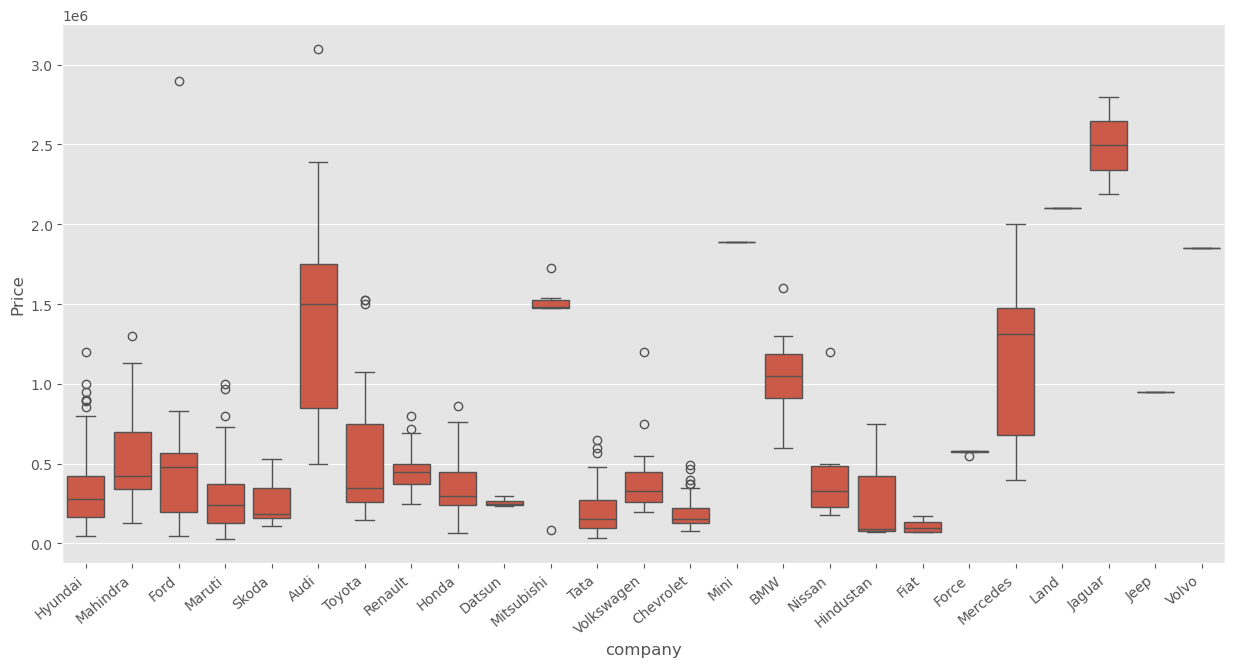

In [26]:
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='company',y='Price',data=car)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

### Checking relationship of Year with Price

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 13.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 13.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 6.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 10.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 7.7% of the points c

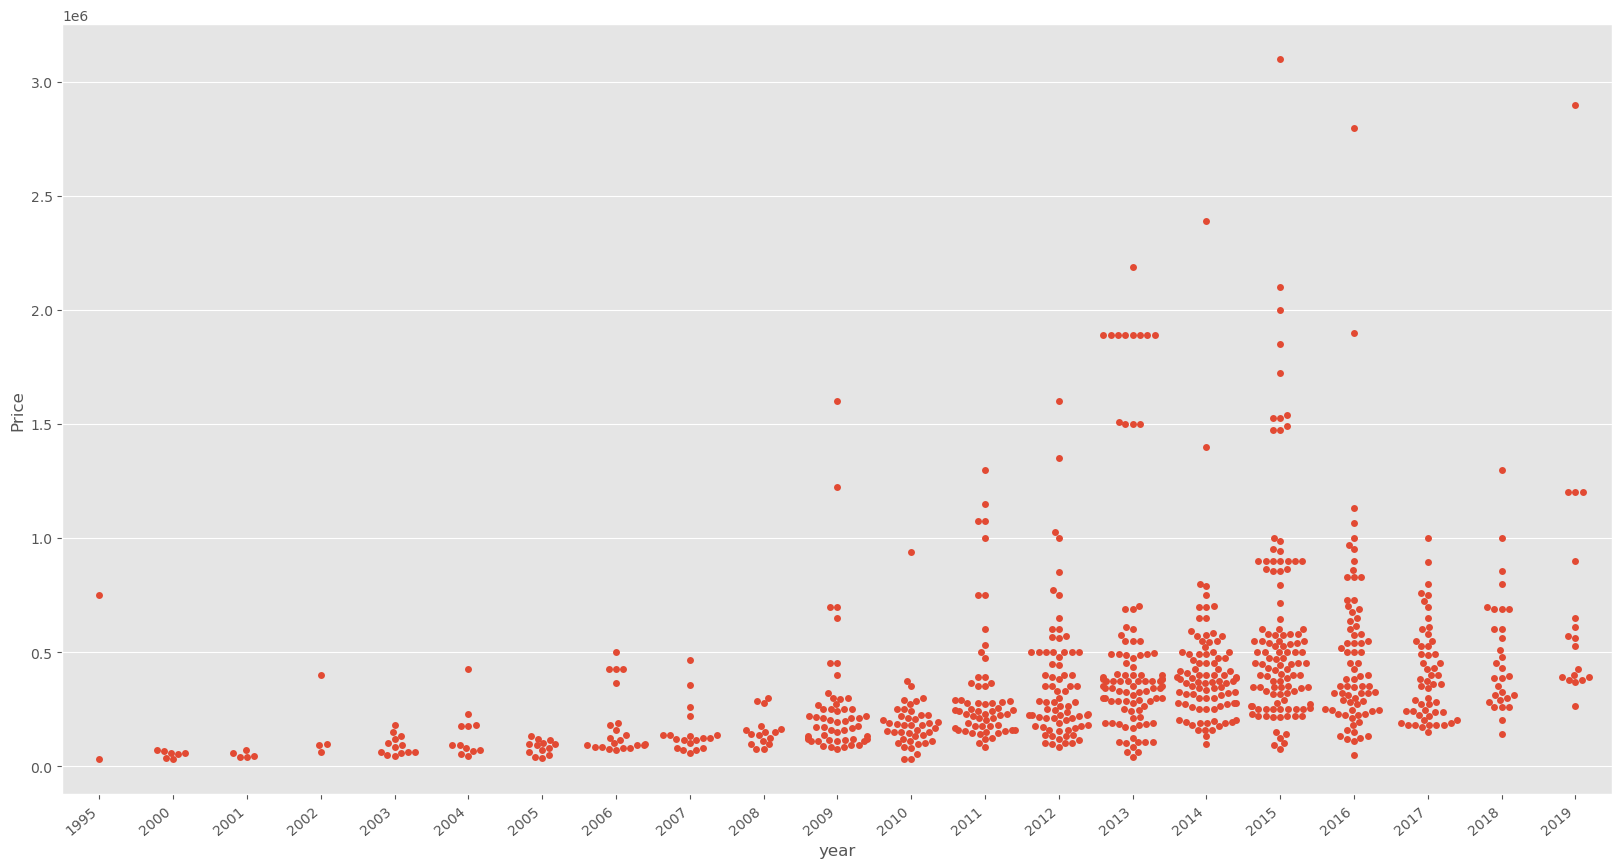

In [149]:
plt.subplots(figsize=(20,10))
ax=sns.swarmplot(x='year',y='Price',data=car)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

### Checking relationship of kms_driven with Price

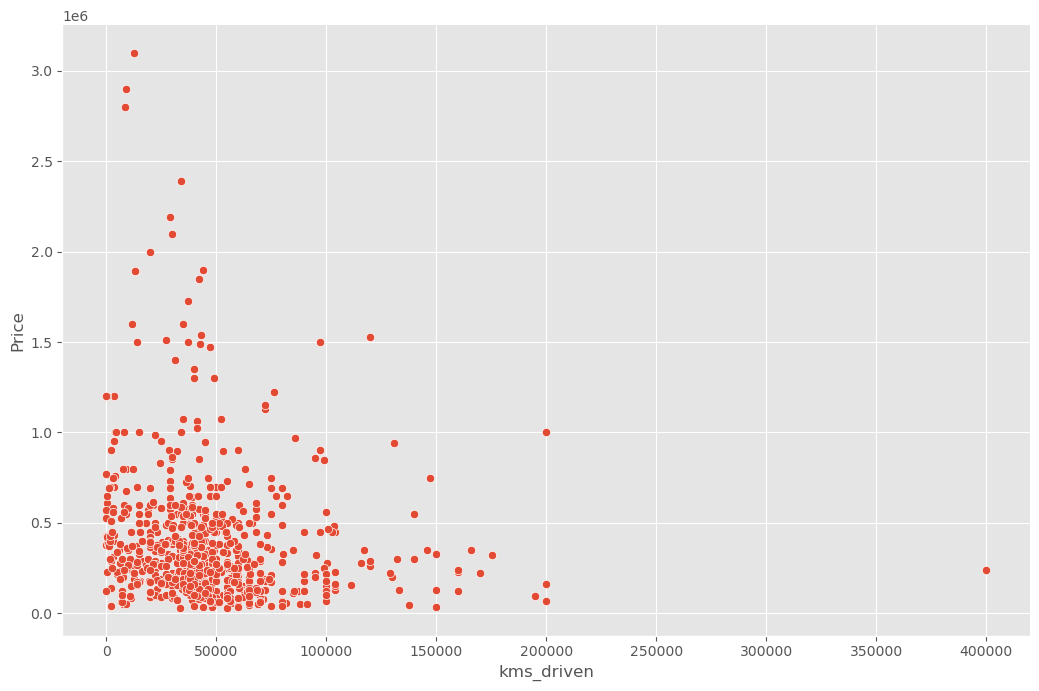

In [150]:
sns.relplot(x='kms_driven',y='Price',data=car,height=7,aspect=1.5)

### Checking relationship of Fuel Type with Price

<Axes: xlabel='fuel_type', ylabel='Price'>

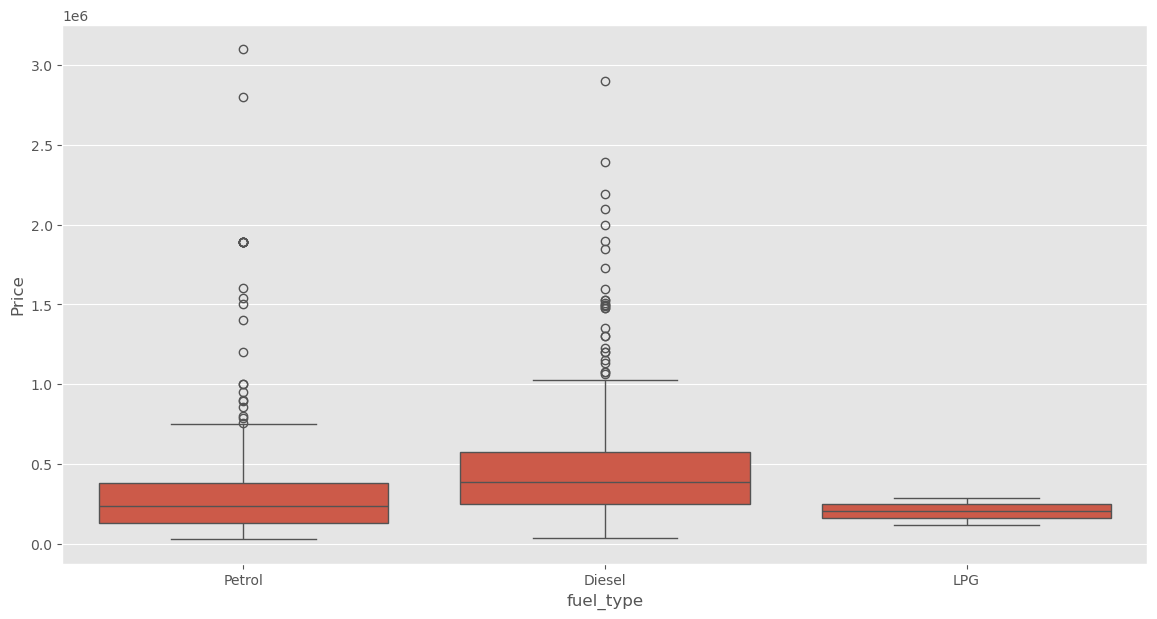

In [151]:
plt.subplots(figsize=(14,7))
sns.boxplot(x='fuel_type',y='Price',data=car)

### Relationship of Price with FuelType, Year and Company mixed

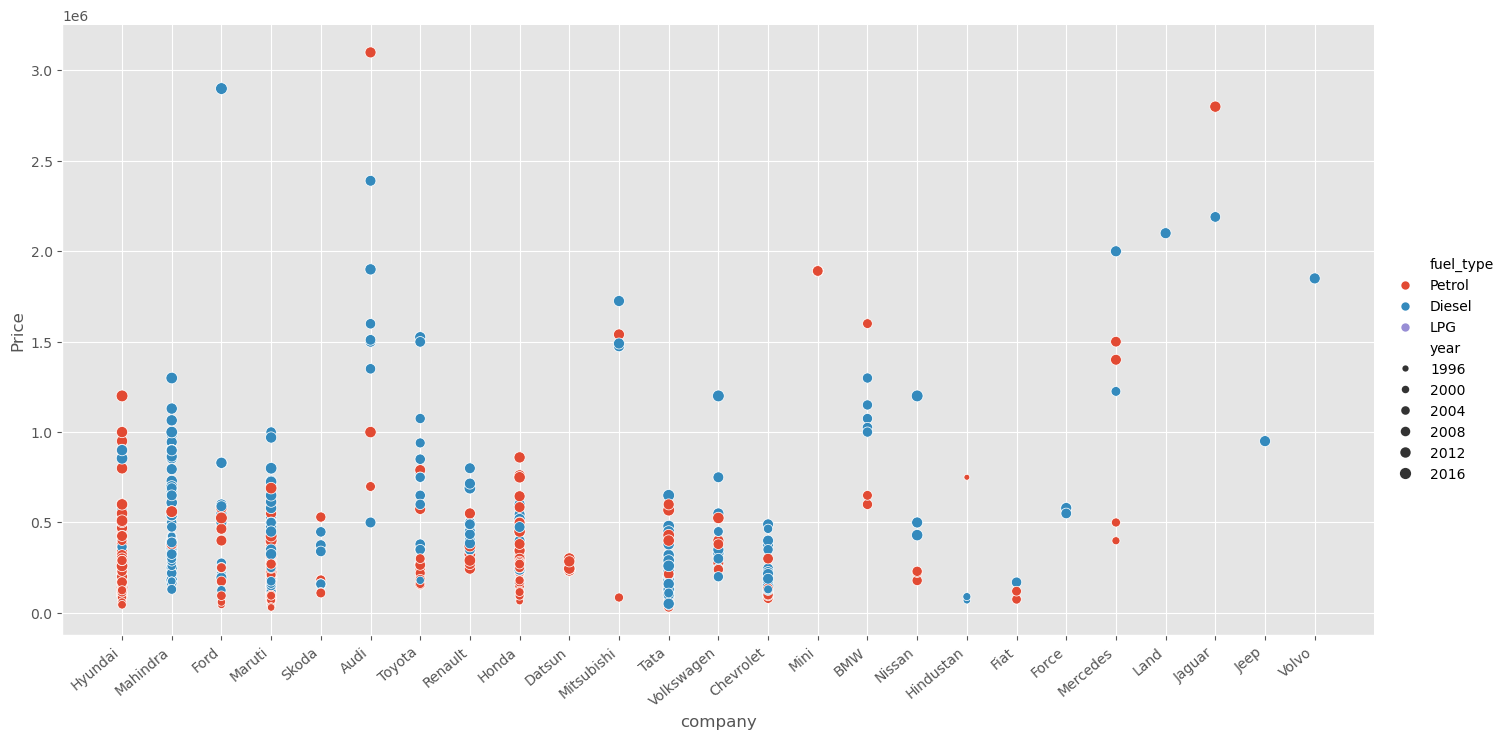

In [153]:
ax=sns.relplot(x='company',y='Price',data=car,hue='fuel_type',size='year',height=7,aspect=2)
ax.set_xticklabels(rotation=40,ha='right')

### Extracting Training Data

In [154]:
X=car[['name','company','year','kms_driven','fuel_type']]
y=car['Price']

In [155]:
X

,name,company,year,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,36000,Diesel
4,Ford Figo,Ford,2012,41000,Diesel
...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,50000,Petrol
812,Tata Indica V2,Tata,2009,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,132000,Petrol
814,Tata Zest XM,Tata,2018,27000,Diesel


In [156]:
y.shape

(815,)

### Applying Train Test Split

In [157]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [158]:
from sklearn.linear_model import LinearRegression

In [36]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

#### Creating an OneHotEncoder object to contain all the possible categories

In [160]:
ohe=OneHotEncoder()
ohe.fit(X[['name','company','fuel_type']])

OneHotEncoder()

In [162]:
# ohe.categories_

#### Creating a column transformer to transform categorical columns

In [163]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']),
                                    remainder='passthrough')

#### Linear Regression Model

In [164]:
lr=LinearRegression()

#### Making a pipeline

In [165]:
pipe=make_pipeline(column_trans,lr)

#### Fitting the  model

In [166]:
pipe.fit(X_train,y_train)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol'], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('linearregression', LinearRegression())])

In [167]:
y_pred=pipe.predict(X_test)

#### Checking R2 Score

In [168]:
r2_score(y_test,y_pred)

0.7546028851642979

#### Finding the model with a random state of TrainTestSplit where the model was found to give almost 0.89 as r2_score

In [169]:
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [172]:
scores

[0.6397329596929177,
 0.5707130404514189,
 0.6119501356345934,
 0.4753993610482421,
 0.7936579467121454,
 0.6043188680519391,
 0.4447860931182137,
 0.5204604228655835,
 0.5444855523948603,
 0.6454957747186709,
 0.6669252842392259,
 0.6569961959288602,
 0.4602622674137037,
 0.5970214613625029,
 0.7183351612977357,
 0.5956064028526546,
 0.4691664323295126,
 0.6712048499029726,
 0.5748839813188966,
 0.7054396768619656,
 0.7178343612826015,
 0.38736746212244233,
 0.6499511362162966,
 0.575111728777244,
 0.457530182180633,
 0.4839702324513171,
 0.7341303522142902,
 0.7364676907413555,
 0.6977866855153088,
 0.596065172106509,
 0.67676005619743,
 0.8446834742483452,
 0.7440877755147729,
 0.758568894633633,
 0.6369452102644122,
 0.79786299453949,
 0.4864259514678687,
 0.4855378371373077,
 0.48795146746856166,
 0.7621636552168934,
 0.42594317669947435,
 0.6947681407477149,
 0.4849542713417694,
 0.5152396603737138,
 0.6071045033909874,
 0.7118556630985855,
 0.5010514291640591,
 0.472045166632481

In [177]:
np.argmax(scores)

np.int64(302)

In [178]:
scores[np.argmax(scores)]

0.8959285359819742

In [179]:
pipe.predict(pd.DataFrame(columns=X_test.columns,data=np.array(['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']).reshape(1,5)))

array([430345.10228051])

#### The best model is found at a certain random state 

In [180]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=np.argmax(scores))
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)

0.8959285359819742

In [182]:
import pickle

In [ ]:
pickle.dump(pipe,open('LinearRegressionModel.pkl','wb'))   #wb -- write binary

In [184]:
# Let's predict one data. provide input like 'name','company','year','kms_driven','fuel_type' and the model will predict the price

In [189]:
pipe.predict(pd.DataFrame([['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']],columns=['name','company','year','kms_driven','fuel_type']))

array([507857.7381856])